# Fitting data points 

There are several steps to fitting the data points:
- Import the libraries
- Load the dataset
- Define fitting function
- Fit the function into data points
- Visualize the result

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0,
         1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0,
         15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

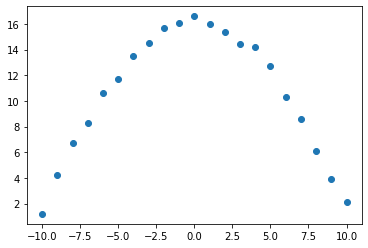

In [3]:
#Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')

# 1. Gaussian Function

In [15]:
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

In [16]:
parameters, covariance = curve_fit(Gauss, xdata, ydata)

<ipython-input-15-942e5aaeeafa>:3: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


In [18]:
fit_A = parameters[0]
fit_B = parameters[1]
#fit_C = parameters[2]
print(fit_A)
print(fit_B)
#print(fit_C)

16.934286340519687
0.015739600927241554


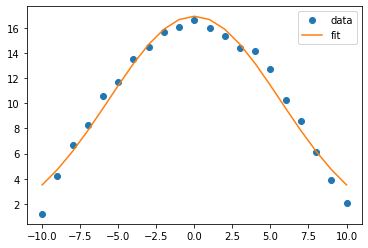

In [19]:
fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

In [20]:
SE = np.sqrt(np.diag(covariance))
SE_A = SE[0]
SE_B = SE[1]
#SE_C = SE[2]

print(F'The value of A is {fit_A:.5f} with standard error of {SE_A:.5f}.')
print(F'The value of B is {fit_B:.5f} with standard error of {SE_B:.5f}.')
#print(F'The value of C is {fit_C:.5f} with standard error of {SE_C:.5f}.')

The value of A is 16.93429 with standard error of 0.35658.
The value of B is 0.01574 with standard error of 0.00087.


# 2.Cosine function

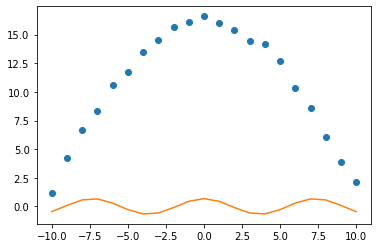

In [21]:
def cos_func(x, D, E):
    y = D*np.cos(E*x)
    return y

parameters, covariance = curve_fit(cos_func, xdata, ydata)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')

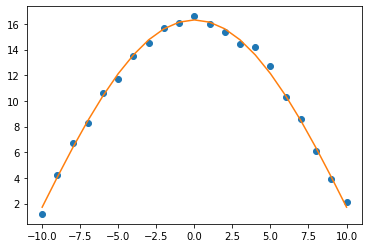

In [34]:
guess = [16, 0.1]
parameters, covariance = curve_fit(cos_func, xdata, ydata, p0=guess)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')
plt.savefig('03-cosine_fit2.png')

In [23]:
SE = np.sqrt(np.diag(covariance))
SE_D = SE[0]
SE_E = SE[1]

print(F'The value of A is {fit_D:.5f} with standard error of {SE_D:.5f}.')
print(F'The value of B is {fit_E:.5f} with standard error of {SE_E:.5f}.')

The value of A is 16.31473 with standard error of 0.11091.
The value of B is 0.14649 with standard error of 0.00090.


# 3.Fitting a Lennard-Jones potential

Consider the following data computed for a helium dimer. The interaction energy at several different internuclear separations is given. Fit this data to a Lennard-Jones potential. 
V=4ε((σ/r)^12 − (σ/r)^6)

In [24]:
# Internuclear separation in angstroms
distances = [2.875, 3.0, 3.125, 3.25, 3.375, 3.5, 3.75, 4.0, 4.5, 5.0, 6.0]
# Energy in Wavenumbers
energies = [0.35334378061169025, -2.7260131253801405, -4.102738968283382, -4.557042640311599, -4.537519193684069, -4.296388508321034, -3.6304745046204117, -3.0205368595885536, -2.1929538006724814, -1.7245616790238782, -1.2500789753171557]

In [25]:
distances = np.asarray(distances)
energies = np.asarray(energies)

In [26]:
def LJ_func(r, epsilon, sigma):
    V = 4*epsilon*((sigma/r)**12-(sigma/r)**6)
    return V

In [27]:
parameters, covariance = curve_fit(LJ_func, distances, energies)

In [28]:
fit_epsilon = parameters[0]
fit_sigma = parameters[1]

In [29]:
print(F'The value of epsilon is {fit_epsilon:.3f} wavenumbers.')
print(F'The value of sigma is {fit_sigma:.3f} angstroms.')

The value of epsilon is 4.857 wavenumbers.
The value of sigma is 2.893 angstroms.


In [30]:
fit_energies = LJ_func(distances, fit_epsilon, fit_sigma)

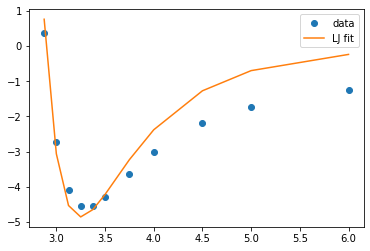

In [32]:
plt.plot(distances, energies, 'o', label='data')
plt.plot(distances, fit_energies, '-', label='LJ fit')
plt.legend()

# Fitting with Y-error bars

In [35]:
def func(x, a, b, c):
    return a * x *x + b*x + c



In [37]:
# test data and error
x = np.linspace(-10, 10, 100)
y0 = - 0.07 * x * x + 0.5 * x + 2.
noise = np.random.normal(0.0, 1.0, len(x))
y = y0 + noise

In [38]:
# curve fit [with only y-error]
popt, pcov = curve_fit(func, x, y, sigma=1./(noise*noise))
perr = np.sqrt(np.diag(pcov))

In [43]:
#print fit parameters and 1-sigma estimates
print('fit parameter 1-sigma error')
print('----------')
for i in range(len(popt)):
    print(str(popt[i])+' +- '+str(perr[i]))

fit parameter 1-sigma error
----------
-0.07364563196166367 +- 0.007244972402382036
0.661246472150034 +- 0.039534154351696264
2.6298814563167854 +- 0.3340829116672938


In [45]:
# prepare confidence level curves
nstd = 5. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr

fit = func(x, *popt)
fit_up = func(x, *popt_up)
fit_dw = func(x, *popt_dw)

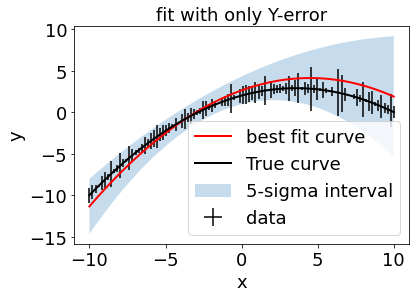

In [53]:
#plot
fig, ax = plt.subplots(1)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size']= 20
plt.errorbar(x, y0, yerr=noise, xerr=0, hold=True, ecolor='k', fmt='none', label='data')

plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title('fit with only Y-error', fontsize=18)
plt.plot(x, fit, 'r', lw=2, label='best fit curve')
plt.plot(x, y0, 'k-', lw=2, label='True curve')
ax.fill_between(x, fit_up, fit_dw, alpha=.25, label='5-sigma interval')
plt.legend(loc='lower right',fontsize=18)
plt.show()



# Fitting without giving Y-error

In [54]:
# curve fit [with only y-error]
popt, pcov = curve_fit(func, x, y)
perr = np.sqrt(np.diag(pcov))

In [55]:
#print fit parameters and 1-sigma estimates
print('fit parameter 1-sigma error')
print('----------')
for i in range(len(popt)):
    print(str(popt[i])+' +- '+str(perr[i]))

fit parameter 1-sigma error
----------
-0.0685918034417682 +- 0.007244972402382036
0.531292132912261 +- 0.039534154351696264
1.9954371868431626 +- 0.3340829116672938


In [56]:
# prepare confidence level curves
nstd = 5. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr

fit = func(x, *popt)
fit_up = func(x, *popt_up)
fit_dw = func(x, *popt_dw)

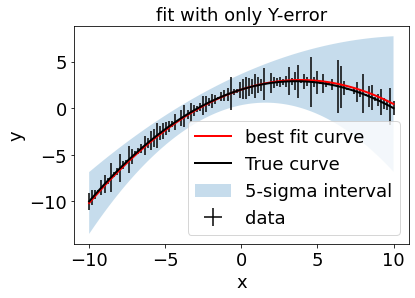

In [57]:
#plot
fig, ax = plt.subplots(1)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size']= 20
plt.errorbar(x, y0, yerr=noise, xerr=0, hold=True, ecolor='k', fmt='none', label='data')

plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title('fit with only Y-error', fontsize=18)
plt.plot(x, fit, 'r', lw=2, label='best fit curve')
plt.plot(x, y0, 'k-', lw=2, label='True curve')
ax.fill_between(x, fit_up, fit_dw, alpha=.25, label='5-sigma interval')
plt.legend(loc='lower right',fontsize=18)
plt.show()

# Curve Fitting Example with leastsq() Function 

We need a test data for this tutorial to implement curve fitting and we can define a simple $x$ input and $y$ output data for this tutorial. You may apply the same method for your target data.

In [84]:
from numpy import array
y = array([12, 8, 11, 7, 5, 2, 3, 5, 6, 4, 5, 7, 8, 13, 19, 22, 25])
x = array(range(len(y)))

Next, we'll define the functions to use in leastsq() function and check the differences in fitting. Below code, I defined three types of function to fit. You can also add or change the formulas in the functions to observe the fitting differences. 

We use below equations as a fitting function.

            a) y = ax^2 + bx + c

            b) y = ax^3 + bx + c

            c) y = ax^2 + bx

In [85]:

def func1(params, x, y):
    a, b, c = params[0], params[1], params[2]
    residual = y-(a*x**2+b*x+c)
    return residual

def func2(params, x, y):
    a, b, c = params[0], params[1], params[2]
    residual = y-(a*x**3+b*x+c)
    return residual

def func3(params, x, y):
    a, b, c = params[0], params[1], params[2]
    residual = y-(a*x**2+b*x)
    return residual

Initial parameters are required for the method and we can start with 0 values. 

In [86]:
params = [0, 0, 0]

Now, we'll set target function, initial parameters, and x and y data into the leastsq() function and get the output data that contains a, b, and c values. Then we'll calculate y fitted by using derived a, b, and c values for each function.

In [97]:
from scipy.optimize import leastsq

result_1 = leastsq(func1, params, (x, y))
a, b, c = result_1[0][0], result_1[0][1], result_1[0][2]
yfit1 = a*x**2+b*x+c

result_2 = leastsq(func2, params, (x, y))
a2, b2, c2 = result_2[0][0], result_2[0][1], result_2[0][2]
yfit2 = a2*x**3+b2*x+c2

result_3 = leastsq(func3, params, (x, y))
a3, b3, c3 = result_3[0][0], result_3[0][1], result_3[0][2]
yfit3 = a3*x**2+b3*x 

Finally, we'll visualize the results in a plot to check the deference visually.

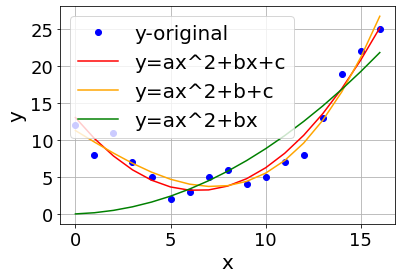

In [98]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, color="red", label="y=ax^2+bx+c")
plt.plot(x, yfit2, color="orange", label="y=ax^2+b+c")
plt.plot(x, yfit3, color="green", label="y=ax^2+bx")
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc='best', fancybox=True, shadow=True)
plt.legend()
plt.grid(True)
plt.show()

In [99]:
print(result_1)
print(result_2)
print(result_3)

(array([ 0.23993808, -3.07920537, 13.04850363]), 3)
(array([ 9.90034504e-03, -1.56677716e+00,  1.12920537e+01]), 3)
(array([0.08042092, 0.07923438, 0.        ]), 1)
